## Import

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
s = (train.dtypes == 'object')
# print (s)
object_cols = list(s[s].index)
# print (s[s])

print("Categorical variables in the dataset:", object_cols)

s = (train.dtypes == 'int64')
t = (train.dtypes == 'float64')


# print (s)
intype = list(s[s].index)
floatype = list(t[t].index)

# print (s[s])
# print (s[s].index)

intype.extend(floatype)

print("Numerical variables in the dataset:", intype)

Categorical variables in the dataset: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical variables in the dataset: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 

In [ ]:
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
print("Numerical variables in the dataset:", intype)

Numerical variables in the dataset: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']


## Data Cleansing

In [ ]:
for i in test.columns:
    print(i)
    print(test[test[i] == ' '].index)
    
for i in train.columns:
    print(i)
    print(train[train[i] == ' '].index)

Id
Int64Index([], dtype='int64')
MSSubClass
Int64Index([], dtype='int64')
MSZoning
Int64Index([], dtype='int64')
LotFrontage
Int64Index([], dtype='int64')
LotArea
Int64Index([], dtype='int64')
Street
Int64Index([], dtype='int64')
Alley
Int64Index([], dtype='int64')
LotShape
Int64Index([], dtype='int64')
LandContour
Int64Index([], dtype='int64')
Utilities
Int64Index([], dtype='int64')
LotConfig
Int64Index([], dtype='int64')
LandSlope
Int64Index([], dtype='int64')
Neighborhood
Int64Index([], dtype='int64')
Condition1
Int64Index([], dtype='int64')
Condition2
Int64Index([], dtype='int64')
BldgType
Int64Index([], dtype='int64')
HouseStyle
Int64Index([], dtype='int64')
OverallQual
Int64Index([], dtype='int64')
OverallCond
Int64Index([], dtype='int64')
YearBuilt
Int64Index([], dtype='int64')
YearRemodAdd
Int64Index([], dtype='int64')
RoofStyle
Int64Index([], dtype='int64')
RoofMatl
Int64Index([], dtype='int64')
Exterior1st
Int64Index([], dtype='int64')
Exterior2nd
Int64Index([], dtype='int64'

### Function to handle missing values

In [ ]:
def checknull(df):
    null_obj = []
    null_num = []
    
    df_null=list(df.columns[df.isnull().sum()>0])
    
    for c in df_null:
        for o in object_cols:
            if c==o:
                null_obj.append(c)
                
    print('Null with object datatype')
    print(null_obj)

    for c in df_null:
        for o in intype:
            if c==o:
                null_num.append(c)
                
    print('\nNull with numerical datatype')
    print(null_num)
    
    return null_obj, null_num
    
def fillnone(null_obj, null_num, df):
    for i in null_obj:
        print(i)
        df[i]=df[i].fillna('Absent')
        print(df[i].value_counts())
        print('All filled with Absent succesfully\n')
        
    for i in null_num:
        print(i)
        df[i]=df[i].fillna(0)
        print('All filled with 0 succesfully\n')

In [ ]:
null_obj, null_num = checknull(train)
fillnone(null_obj, null_num, train)

Null with object datatype
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

Null with numerical datatype
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
Alley
Absent    1369
Grvl        50
Pave        41
Name: Alley, dtype: int64
All filled with Absent succesfully

MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
Absent       8
Name: MasVnrType, dtype: int64
All filled with Absent succesfully

BsmtQual
TA        649
Gd        618
Ex        121
Absent     37
Fa         35
Name: BsmtQual, dtype: int64
All filled with Absent succesfully

BsmtCond
TA        1311
Gd          65
Fa          45
Absent      37
Po           2
Name: BsmtCond, dtype: int64
All filled with Absent succesfully

BsmtExposure
No        953
Av        221
Gd        134
Mn        114
Absent     38
Name: BsmtExposure, dtype: int64
All fil

In [ ]:
# null_obj = [] 
# null_num = []
null_obj, null_num=checknull(test)

Null with object datatype
['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']

Null with numerical datatype
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [ ]:
fillnone(null_obj, null_num, test)

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Absent        4
Name: MSZoning, dtype: int64
All filled with Absent succesfully

Alley
Absent    1352
Grvl        70
Pave        37
Name: Alley, dtype: int64
All filled with Absent succesfully

Utilities
AllPub    1457
Absent       2
Name: Utilities, dtype: int64
All filled with Absent succesfully

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
CBlock       1
AsphShn      1
Absent       1
Name: Exterior1st, dtype: int64
All filled with Absent succesfully

Exterior2nd
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Absent       1
Name: Exterior2nd, dtype: int64
All filled with Absent succesfully

M

In [ ]:
test.isnull().sum().sort_values(ascending=False)

SaleCondition    0
SaleType         0
RoofStyle        0
RoofMatl         0
Exterior1st      0
                ..
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
Id               0
Length: 80, dtype: int64

In [ ]:
train.isnull().sum().sort_values(ascending=False)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
               ..
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
FireplaceQu     0
Id              0
Length: 81, dtype: int64

In [ ]:
def ages(df):
    df['building_age'] = 2022-df['YearBuilt']
    df['remodeled_age']= np.where(df['YearRemodAdd']>0,2022-df['YearRemodAdd'],0)
    df['garage_age'] = np.where(df['GarageYrBlt']>0,2022-df['GarageYrBlt'],0)

In [ ]:
ages(test)
ages(train)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
s = (train.dtypes == 'object')
# print (s)
object_cols = list(s[s].index)
# print (s[s])

print("Categorical variables in the dataset:", object_cols)

s = (train.dtypes == 'int64')
t = (train.dtypes == 'float64')


# print (s)
intype = list(s[s].index)
floatype = list(t[t].index)

# print (s[s])
# print (s[s].index)

intype.extend(floatype)

print("Numerical variables in the dataset:", intype)

Categorical variables in the dataset: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical variables in the dataset: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 

In [ ]:
# model = pd.get_dummies(train,columns=object_cols ,drop_first=True)
# model.info()

In [ ]:
s = (test.dtypes == 'object')
# print (s)
object_cols = list(s[s].index)
# print (s[s])

print("Categorical variables in the dataset:", object_cols)

s = (test.dtypes == 'int64')
t = (test.dtypes == 'float64')


# print (s)
intype = list(s[s].index)
floatype = list(t[t].index)

# print (s[s])
# print (s[s].index)

intype.extend(floatype)

print("Numerical variables in the dataset:", intype)

Categorical variables in the dataset: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical variables in the dataset: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',

## Look for appropriate outlier to be handled

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                 729.50
MSSubClass          50.00
LotFrontage         37.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         164.25
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         43.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
building_age

In [ ]:
iqr=(train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))

print(train < (Q1 - 1.5 * IQR)) or (train > (Q3 + 1.5 * IQR))

      1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BldgType  BsmtCond  \
0        False     False      False  False         False     False     False   
1        False     False      False  False         False     False     False   
2        False     False      False  False         False     False     False   
3        False     False      False  False         False     False     False   
4        False     False      False  False         False     False     False   
...        ...       ...        ...    ...           ...       ...       ...   
1455     False     False      False  False         False     False     False   
1456     False     False      False  False         False     False     False   
1457     False     False      False  False         False     False     False   
1458     False     False      False  False         False     False     False   
1459     False     False      False  False         False     False     False   

      BsmtExposure  BsmtFinSF1  BsmtFin

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,building_age,garage_age,remodeled_age
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
col = []
rw = []
n=0
for x in iqr.columns:
    for y in range(0, len(iqr)):
#         print(iqr[x][y])
        if (iqr[x][y]== (1==1)):
            print(iqr[x][y])
            col.append(x)
            rw.append(y)
            n=n+1
            
print('amount of outliers '+ str(n))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


True
True
True
True
True
True
True
True
True
amount of outliers 1676


In [ ]:
from collections import Counter
Counter(col)

Counter({'1stFlrSF': 20,
         '2ndFlrSF': 2,
         '3SsnPorch': 24,
         'BedroomAbvGr': 35,
         'BsmtFinSF1': 7,
         'BsmtFinSF2': 167,
         'BsmtFullBath': 1,
         'BsmtHalfBath': 82,
         'BsmtUnfSF': 29,
         'EnclosedPorch': 208,
         'Fireplaces': 5,
         'GarageArea': 21,
         'GarageCars': 5,
         'GarageYrBlt': 81,
         'GrLivArea': 31,
         'KitchenAbvGr': 68,
         'LotArea': 69,
         'LotFrontage': 16,
         'LowQualFinSF': 26,
         'MSSubClass': 103,
         'MasVnrArea': 98,
         'MiscVal': 52,
         'OpenPorchSF': 77,
         'OverallCond': 125,
         'OverallQual': 2,
         'PoolArea': 7,
         'SalePrice': 61,
         'ScreenPorch': 116,
         'TotRmsAbvGrd': 30,
         'TotalBsmtSF': 61,
         'WoodDeckSF': 32,
         'YearBuilt': 7,
         'building_age': 7,
         'garage_age': 1})

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### drop 'ID' because not really helpfull data

In [ ]:
train.drop("Id",axis=1,inplace=True)

In [ ]:
import scipy.stats
from scipy.stats import chi2

## Feature Selection using Chi Squared Method

In [ ]:
def chisq(var, ds):
    icol.append(var)
    
    contingency_table=pd.crosstab(ds[var],ds["SalePrice"])
#     print('contingency_table :-\n',contingency_table, '\n')

    #Observed Values
    Observed_Values = contingency_table.values 
#     print("Observed Values :-\n",Observed_Values, '\n')

    #Expected Values
    b=scipy.stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
#     print("Expected Values :-\n",Expected_Values, '\n')

    #Degree of Freedom
    no_of_rows=len(contingency_table.iloc[0:2,0])
    no_of_columns=len(contingency_table.iloc[0,0:2])
    df=(no_of_rows-1)*(no_of_columns-1)
    # print("Degree of Freedom:-",df)

    #Significance Level 5%
    alpha=0.05

    #chi-square statistic - χ2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    # print("chi-square statistic:-",chi_square_statistic)

    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=df)
    # print('critical_value:',critical_value)

    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
    # print('p-value:',p_value)
    
    print('var : '+var)

    print('Significance level: ',alpha)
    print('p-value:',p_value, '\n')
    print('chi-square statistic:',chi_square_statistic)
    print('critical_value:',critical_value, '\n')
    print('Degree of Freedom: ',df)
    
    icol_alpha.append(alpha)
    icol_p_value.append(p_value)
    icol_chi_square_statistic.append(chi_square_statistic)
    icol_critical_value.append(critical_value)
    icol_df.append(df)

    #compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
    print('Conclusion for '+var+' variable')
    if chi_square_statistic >= critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
        col_critical.append(var)
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value <= alpha:
        print("Reject H0,There is a relationship between 2 categorical variables \n")
        col_alpha.append(var)
    else:
        print("Retain H0,There is no relationship between 2 categorical variables \n")

In [ ]:
col_critical=[]
col_alpha=[]

icol = []
icol_alpha = []
icol_p_value = []
icol_chi_square_statistic = []
icol_critical_value = []
icol_df = []

for i in train.columns:
    if (i!='SalePrice'):
        chisq(i, train)
    
    
    
# dictionary with list object in values
details = {
    'var' : icol,
    'alpha' : icol_alpha,
    'pvalue' : icol_p_value,
    'chi_square_statistic' : icol_chi_square_statistic,
    'critical_value' : icol_critical_value,
    'degreefreedom' : icol_df
}
  
# creating a Dataframe object 
feature = pd.DataFrame(details)
feature['relation_chisq_critical'] = np.where(feature['chi_square_statistic']>= feature['critical_value'], 'Good', 'No Relation')
feature['relation_pval_alpha'] = np.where(feature['pvalue'] <= feature['alpha'], 'Good', 'No Relation')
    
print(icol)
    # feature

var : MSSubClass
Significance level:  0.05
p-value: 2.897443879712469e-06 

chi-square statistic: 21.883300886870003
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for MSSubClass variable
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables 

var : MSZoning
Significance level:  0.05
p-value: 0.0 

chi-square statistic: 290.00000000000006
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for MSZoning variable
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables 

var : LotFrontage
Significance level:  0.05
p-value: 6.033541222194572e-09 

chi-square statistic: 33.823825297509536
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for LotFrontage variable
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical 

var : MasVnrArea
Significance level:  0.05
p-value: 0.24350557459638933 

chi-square statistic: 1.3601841196778028
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for MasVnrArea variable
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables 

var : ExterQual
Significance level:  0.05
p-value: 0.2687809123214884 

chi-square statistic: 1.2229580573951435
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for ExterQual variable
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables 

var : ExterCond
Significance level:  0.05
p-value: 0.5982185552192554 

chi-square statistic: 0.2776911076443058
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for ExterCond variable
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 

var : BedroomAbvGr
Significance level:  0.05
p-value: 2.2357472095890785e-08 

chi-square statistic: 31.278212290502797
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for BedroomAbvGr variable
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables 

var : KitchenAbvGr
Significance level:  0.05
p-value: 0.7546059822145609 

chi-square statistic: 0.09770114942528738
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for KitchenAbvGr variable
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables 

var : KitchenQual
Significance level:  0.05
p-value: 0.16015212404070167 

chi-square statistic: 1.9727891156462585
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for KitchenQual variable
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no rela

var : YrSold
Significance level:  0.05
p-value: 0.008292418399565515 

chi-square statistic: 6.969208155881355
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for YrSold variable
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables 

var : SaleType
Significance level:  0.05
p-value: 0.5809777277586079 

chi-square statistic: 0.3046566692975533
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for SaleType variable
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables 

var : SaleCondition
Significance level:  0.05
p-value: 2.1305490482959044e-07 

chi-square statistic: 26.91089108910891
critical_value: 3.841458820694124 

Degree of Freedom:  1
Conclusion for SaleCondition variable
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 c

In [ ]:
feature['relation_chisq_critical'].value_counts()

Good           41
No Relation    41
Name: relation_chisq_critical, dtype: int64

In [ ]:
feature['relation_pval_alpha'].value_counts()

Good           41
No Relation    41
Name: relation_pval_alpha, dtype: int64

In [ ]:
feature_new = feature[feature['relation_chisq_critical']=='Good']
feature_new1 = feature_new[feature_new['relation_pval_alpha']== 'Good']
feature_new1

,var,alpha,pvalue,chi_square_statistic,critical_value,degreefreedom,relation_chisq_critical,relation_pval_alpha
0,MSSubClass,0.05,2.897444e-06,21.883301,3.841459,1,Good,Good
1,MSZoning,0.05,0.000000e+00,290.000000,3.841459,1,Good,Good
2,LotFrontage,0.05,6.033541e-09,33.823825,3.841459,1,Good,Good
3,LotArea,0.05,0.000000e+00,1562.285714,3.841459,1,Good,Good
11,Neighborhood,0.05,0.000000e+00,76.918919,3.841459,1,Good,Good
16,OverallQual,0.05,0.000000e+00,497.252874,3.841459,1,Good,Good
17,OverallCond,0.05,2.398082e-14,58.178319,3.841459,1,Good,Good
18,YearBuilt,0.05,0.000000e+00,168.333333,3.841459,1,Good,Good
19,YearRemodAdd,0.05,1.474500e-04,14.404494,3.841459,1,Good,Good
22,Exterior1st,0.05,0.000000e+00,78.087379,3.841459,1,Good,Good


In [ ]:
goodvar=feature_new1['var'].tolist()
goodvar.append('SalePrice')

In [ ]:
train_subset=train[goodvar]

In [ ]:
train_subset.info()
train_subset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Neighborhood   1460 non-null   object 
 5   OverallQual    1460 non-null   int64  
 6   OverallCond    1460 non-null   int64  
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   Exterior1st    1460 non-null   object 
 10  Exterior2nd    1460 non-null   object 
 11  BsmtExposure   1460 non-null   object 
 12  BsmtFinType1   1460 non-null   object 
 13  BsmtFinSF1     1460 non-null   int64  
 14  BsmtUnfSF      1460 non-null   int64  
 15  TotalBsmtSF    1460 non-null   int64  
 16  HeatingQC      1460 non-null   object 
 17  CentralAir     1460 non-null   object 
 18  Electric

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Neighborhood     0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Exterior1st      0
Exterior2nd      0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
OpenPorchSF      0
EnclosedPorch    0
Fence            0
MoSold           0
YrSold           0
SaleCondition    0
building_age     0
remodeled_age    0
garage_age       0
SalePrice        0
dtype: int64

In [ ]:
goodvar.remove('SalePrice')
test_subset=test[goodvar]

In [ ]:
test_subset.info()
test_subset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Neighborhood   1459 non-null   object 
 5   OverallQual    1459 non-null   int64  
 6   OverallCond    1459 non-null   int64  
 7   YearBuilt      1459 non-null   int64  
 8   YearRemodAdd   1459 non-null   int64  
 9   Exterior1st    1459 non-null   object 
 10  Exterior2nd    1459 non-null   object 
 11  BsmtExposure   1459 non-null   object 
 12  BsmtFinType1   1459 non-null   object 
 13  BsmtFinSF1     1459 non-null   float64
 14  BsmtUnfSF      1459 non-null   float64
 15  TotalBsmtSF    1459 non-null   float64
 16  HeatingQC      1459 non-null   object 
 17  CentralAir     1459 non-null   object 
 18  Electric

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Neighborhood     0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
Exterior1st      0
Exterior2nd      0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
OpenPorchSF      0
EnclosedPorch    0
Fence            0
MoSold           0
YrSold           0
SaleCondition    0
building_age     0
remodeled_age    0
garage_age       0
dtype: int64

In [ ]:
def viz(x,y):
    plt.title("House Price vs Squared Feet")
    plt.xlabel(x)
    plt.ylabel(y)
    sns.scatterplot(x=x, y=y, data=train)

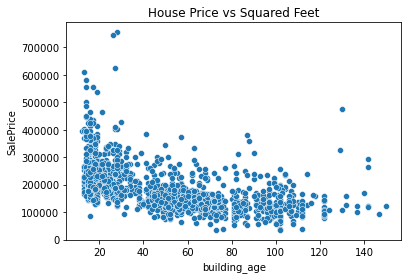

In [ ]:
viz('building_age','SalePrice')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x_cols = list(train_subset.columns)
x_cols.remove('SalePrice')
X = train_subset[x_cols]
y = train_subset['SalePrice'].astype(int)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Neighborhood   1460 non-null   object 
 5   OverallQual    1460 non-null   int64  
 6   OverallCond    1460 non-null   int64  
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   Exterior1st    1460 non-null   object 
 10  Exterior2nd    1460 non-null   object 
 11  BsmtExposure   1460 non-null   object 
 12  BsmtFinType1   1460 non-null   object 
 13  BsmtFinSF1     1460 non-null   int64  
 14  BsmtUnfSF      1460 non-null   int64  
 15  TotalBsmtSF    1460 non-null   int64  
 16  HeatingQC      1460 non-null   object 
 17  CentralAir     1460 non-null   object 
 18  Electric

In [ ]:
s = (X.dtypes == 'object')
# print (s)
object_cols = list(s[s].index)
# print (s[s])

print("Categorical variables in the dataset:", object_cols)

#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    X[i]=X[[i]].apply(LE.fit_transform)
    
print("All features are now numerical!")

Categorical variables in the dataset: ['MSZoning', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleCondition']
All features are now numerical!


## find important feature using importance from Linear Regression

Feature: 0, Score: -200.44610
Feature: 1, Score: -1460.00266
Feature: 2, Score: -33.55073
Feature: 3, Score: 0.41392
Feature: 4, Score: 471.47741
Feature: 5, Score: 18607.97858
Feature: 6, Score: 5210.49612
Feature: 7, Score: 156.00859
Feature: 8, Score: 44.43562
Feature: 9, Score: -386.07484
Feature: 10, Score: -136.07120
Feature: 11, Score: -4482.85698
Feature: 12, Score: -792.54788
Feature: 13, Score: 9.46478
Feature: 14, Score: -5.54983
Feature: 15, Score: 23.43294
Feature: 16, Score: -1822.48032
Feature: 17, Score: 210.36299
Feature: 18, Score: -1098.76995
Feature: 19, Score: -9.62512
Feature: 20, Score: 54.74304
Feature: 21, Score: 54.18837
Feature: 22, Score: -9027.75657
Feature: 23, Score: 3529.99922
Feature: 24, Score: 917.94024
Feature: 25, Score: -11.28902
Feature: 26, Score: -3973.19263
Feature: 27, Score: 16482.29696
Feature: 28, Score: 3.21047
Feature: 29, Score: -1586.09643
Feature: 30, Score: 1080.87934
Feature: 31, Score: 1758.65261
Feature: 32, Score: -14.26739
Featur

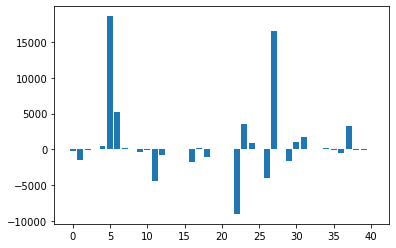

In [ ]:
# define dataset
positive=[]
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    if (v>0):
        positive.append(i)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
positive

[3, 4, 5, 6, 7, 8, 13, 15, 17, 20, 21, 23, 24, 27, 28, 30, 31, 34, 37, 40]

In [ ]:
LR_X=X.iloc[:,positive]

In [ ]:
LR_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   Neighborhood   1460 non-null   int32  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   BsmtFinSF1     1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   CentralAir     1460 non-null   int32  
 9   GrLivArea      1460 non-null   int64  
 10  FullBath       1460 non-null   int64  
 11  TotRmsAbvGrd   1460 non-null   int64  
 12  GarageType     1460 non-null   int32  
 13  GarageCars     1460 non-null   int64  
 14  GarageArea     1460 non-null   int64  
 15  GarageCond     1460 non-null   int32  
 16  PavedDrive     1460 non-null   int32  
 17  Fence          1460 non-null   int32  
 18  SaleCond

In [ ]:
def vizX(x):
    plt.title(x+" vs SalePrice")
    plt.xlabel(x)
    plt.ylabel('SalePrice')
    sns.scatterplot(x=LR_X[x], y=train_subset['SalePrice'])

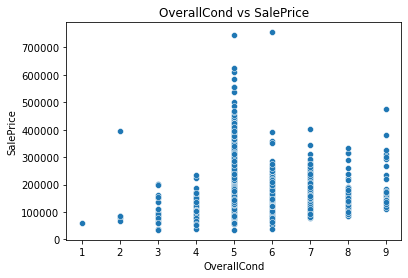

In [ ]:
vizX('OverallCond')

In [ ]:
LR_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   Neighborhood   1460 non-null   int32  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   BsmtFinSF1     1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   CentralAir     1460 non-null   int32  
 9   GrLivArea      1460 non-null   int64  
 10  FullBath       1460 non-null   int64  
 11  TotRmsAbvGrd   1460 non-null   int64  
 12  GarageType     1460 non-null   int32  
 13  GarageCars     1460 non-null   int64  
 14  GarageArea     1460 non-null   int64  
 15  GarageCond     1460 non-null   int32  
 16  PavedDrive     1460 non-null   int32  
 17  Fence          1460 non-null   int32  
 18  SaleCond

In [ ]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int32

In [ ]:
x_test_cols=list(LR_X.columns)

## ML Modelling and Testing (Linear Regression, Polynomial Regression, Decision Tree Reg, Random Forest Reg)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modeltrain = train_subset[x_test_cols]
modeltest = test_subset[x_test_cols]

s = (modeltrain.dtypes == 'object')
# print (s)
object_cols = list(s[s].index)
# print (s[s])

print("Categorical variables in the dataset:", object_cols)

s = (modeltest.dtypes == 'object')
# print (s)
object_cols = list(s[s].index)
# print (s[s])

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Neighborhood', 'CentralAir', 'GarageType', 'GarageCond', 'PavedDrive', 'Fence', 'SaleCondition']
Categorical variables in the dataset: ['Neighborhood', 'CentralAir', 'GarageType', 'GarageCond', 'PavedDrive', 'Fence', 'SaleCondition']


In [ ]:
x_test = pd.get_dummies(modeltest,columns=object_cols,drop_first=True)
x_train = pd.get_dummies(modeltrain,columns=object_cols,drop_first=True)

In [ ]:
y_train = y

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1460 non-null   int64  
 1   OverallQual            1460 non-null   int64  
 2   OverallCond            1460 non-null   int64  
 3   YearBuilt              1460 non-null   int64  
 4   YearRemodAdd           1460 non-null   int64  
 5   BsmtFinSF1             1460 non-null   int64  
 6   TotalBsmtSF            1460 non-null   int64  
 7   GrLivArea              1460 non-null   int64  
 8   FullBath               1460 non-null   int64  
 9   TotRmsAbvGrd           1460 non-null   int64  
 10  GarageCars             1460 non-null   int64  
 11  GarageArea             1460 non-null   int64  
 12  garage_age             1460 non-null   float64
 13  Neighborhood_Blueste   1460 non-null   uint8  
 14  Neighborhood_BrDale    1460 non-null   uint8  
 15  Neig

In [ ]:
y_train

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int32

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.20, random_state=42)
model.fit(X_train, Y_train)
# y_pred = model.predict(X_test)

LinearRegression()

In [ ]:
    print("Score the X-train with Y-train is : ", model.score(X_train,Y_train))
    print("Score the X-test  with Y-test  is : ", model.score(X_test,Y_test))

    # Y_pred=dtc.predict(X_test)
    Y_pred = model.predict(X_test)
    # coef = model.coef_
    # intercept = model.intercept_

    print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
    print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
    print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred))
    # print("Accuracy score " , accuracy_score(Y_test,Y_pred))
    # print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  0.830084754812267
Score the X-test  with Y-test  is :  0.8487206892534064
 Mean absolute error is  20477.30616150309
 Mean squared  error is  1160361661.8248017
 Median absolute error is  14356.206633586437


In [ ]:
model = LinearRegression(normalize = True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.7, random_state=42)
model.fit(X_train, Y_train)
# y_pred = model.predict(X_test)

LinearRegression(normalize=True)

In [ ]:
    print("Score the X-train with Y-train is : ", model.score(X_train,Y_train))
    print("Score the X-test  with Y-test  is : ", model.score(X_test,Y_test))

    # Y_pred=dtc.predict(X_test)
    Y_pred = model.predict(X_test)
    # coef = model.coef_
    # intercept = model.intercept_

    print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
    print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
    print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred))
    # print("Accuracy score " , accuracy_score(Y_test,Y_pred))
    # print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  0.906438801329997
Score the X-test  with Y-test  is :  0.7828987004066804
 Mean absolute error is  20508.496086105675
 Mean squared  error is  1467119158.9618394
 Median absolute error is  13256.0


<AxesSubplot:title={'center':'House Price vs Squared Feet'}, xlabel='Predicted Values', ylabel='LotArea'>

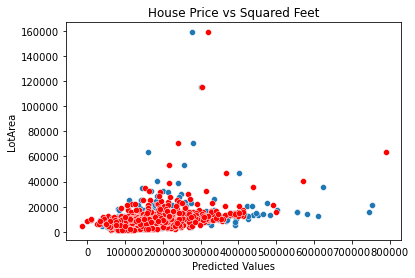

In [ ]:
df = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':Y_pred})
df

plt.title("House Price vs Squared Feet")
plt.xlabel('Real Values')
# plt.xlabel('Predicted Values')
plt.ylabel('LotArea')
sns.scatterplot(x=df['Real Values'], y=X_test['LotArea'])

plt.title("House Price vs Squared Feet")
# plt.xlabel('Real Values')
plt.xlabel('Predicted Values')
plt.ylabel('LotArea')
sns.scatterplot(x=df['Predicted Values'], y=X_test['LotArea'], color='red')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.5, random_state=42)
model.fit(X_train, Y_train)
# y_pred = model.predict(X_test)

LinearRegression(normalize=True)

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
model = LinearRegression()
model.fit(X_poly, Y_train)

LinearRegression()

In [ ]:
print("Score the X-train with Y-train is : ", model.score(X_poly,Y_train))
print("Score the X-test  with Y-test  is : ", model.score(X_test_poly,Y_test))

# Y_pred=dtc.predict(X_test)
Y_pred = model.predict(X_test_poly)
# coef = model.coef_
# intercept = model.intercept_

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred))
# print("Accuracy score " , accuracy_score(Y_test,Y_pred))
# print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  0.9975516709635295
Score the X-test  with Y-test  is :  -1484574.1473700204
 Mean absolute error is  28628420.622977365
 Mean squared  error is  1.0121253397735266e+16
 Median absolute error is  187818.04447311163


<AxesSubplot:title={'center':'House Price vs Squared Feet'}, xlabel='Predicted Values', ylabel='LotArea'>

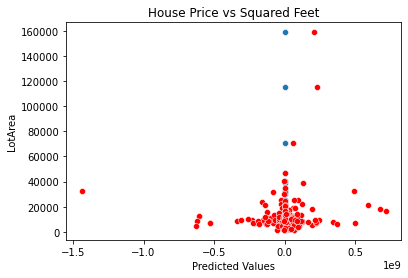

In [ ]:
df = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':Y_pred})
df

plt.title("House Price vs Squared Feet")
plt.xlabel('Real Values')
# plt.xlabel('Predicted Values')
plt.ylabel('LotArea')
sns.scatterplot(x=df['Real Values'], y=X_test['LotArea'])

plt.title("House Price vs Squared Feet")
# plt.xlabel('Real Values')
plt.xlabel('Predicted Values')
plt.ylabel('LotArea')
sns.scatterplot(x=df['Predicted Values'], y=X_test['LotArea'], color='red')

In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)

<AxesSubplot:title={'center':'House Price vs Squared Feet'}, xlabel='Predicted Values', ylabel='LotArea'>

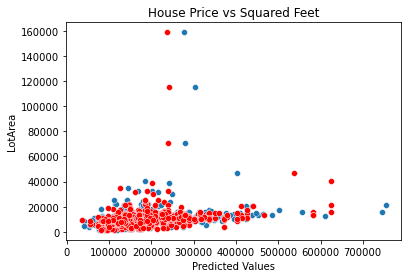

In [ ]:
df = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':y_pred})
df

plt.title("House Price vs Squared Feet")
plt.xlabel('Real Values')
# plt.xlabel('Predicted Values')
plt.ylabel('LotArea')
sns.scatterplot(x=df['Real Values'], y=X_test['LotArea'])

plt.title("House Price vs Squared Feet")
# plt.xlabel('Real Values')
plt.xlabel('Predicted Values')
plt.ylabel('LotArea')
sns.scatterplot(x=df['Predicted Values'], y=X_test['LotArea'], color='red')

In [ ]:
from sklearn.ensemble import RandomForestRegressor # for building the model

In [ ]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 42)

# Fitting the Random Forest Regression model to the data
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
print("Score the X-train with Y-train is : ", model.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", model.score(X_test,Y_test))

# Y_pred=dtc.predict(X_test)
Y_pred = model.predict(X_test)
# coef = model.coef_
# intercept = model.intercept_

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred))
# print("Accuracy score " , accuracy_score(Y_test,Y_pred))
# print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  0.9740735958832234
Score the X-test  with Y-test  is :  0.8551243161108643
 Mean absolute error is  19341.195342465755
 Mean squared  error is  987705816.3136986
 Median absolute error is  13055.800000000003


In [ ]:
df = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
892,154500,136000.0
1105,325000,336000.0
413,115000,120000.0
522,159000,197500.0
1036,315500,378500.0
...,...,...
117,155000,84500.0
1179,93000,96500.0
673,257500,223000.0
249,277000,237500.0


<AxesSubplot:title={'center':'House Price vs Squared Feet'}, xlabel='Predicted Values', ylabel='LotArea'>

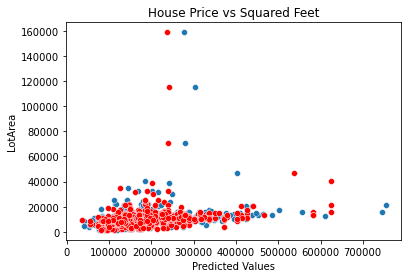

In [ ]:
plt.title("House Price vs Squared Feet")
plt.xlabel('Real Values')
# plt.xlabel('Predicted Values')
plt.ylabel('LotArea')
sns.scatterplot(x=df['Real Values'], y=X_test['LotArea'])

plt.title("House Price vs Squared Feet")
# plt.xlabel('Real Values')
plt.xlabel('Predicted Values')
plt.ylabel('LotArea')
sns.scatterplot(x=df['Predicted Values'], y=X_test['LotArea'], color='red')

## Create function to test the test dataset using all modelled ML method

In [ ]:
def regre(X_train, Y_train, x_test):
    X_test=x_test.copy()
    model = LinearRegression(normalize = True)
    model.fit(X_train, Y_train)

    print('---------------------------')
    print('Linear Regression')
    print('---------------------------')

    print("Score the X-train with Y-train is : ", model.score(X_train,Y_train))

    Y_pred=model.predict(X_test)
    Y_pred_linregre = model.predict(X_test)
    coef = model.coef_
    intercept = model.intercept_

    print('---------------------------')

    print('---------------------------')
    print('Decision Tree Regression')
    print('---------------------------')

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, Y_train)

    print("Score the X-train with Y-train is : ", regressor.score(X_train,Y_train))

    Y_pred_dectree = regressor.predict(X_test)

    print('---------------------------')

    print('---------------------------')
    print('Random Forest Regression')
    print('---------------------------')

    rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
    rf.fit(X_train, Y_train)

    print("Score the X-train with Y-train is : ", rf.score(X_train,Y_train))

    Y_pred_randfor = rf.predict(X_test)

    print('---------------------------')
    
    X_test['linear_reg_pred']=Y_pred_linregre
    X_test['decisiontree_reg_pred']=Y_pred_dectree
    X_test['randomforest_reg_pred']=Y_pred_randfor
    
    return X_test

In [ ]:
x_test = x_test.drop('linear_reg_pred', 1)
x_test = x_test.drop('decisiontree_reg_pred', 1)
x_test = x_test.drop('randomforest_reg_pred', 1)

In [ ]:
output = regre(x_train, y_train, x_test)

---------------------------
Linear Regression
---------------------------
Score the X-train with Y-train is :  0.836885913681138
---------------------------
---------------------------
Decision Tree Regression
---------------------------
Score the X-train with Y-train is :  0.9999932047564615
---------------------------
---------------------------
Random Forest Regression
---------------------------
Score the X-train with Y-train is :  0.9777209453937201
---------------------------


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1459 non-null   int64  
 1   OverallQual            1459 non-null   int64  
 2   OverallCond            1459 non-null   int64  
 3   YearBuilt              1459 non-null   int64  
 4   YearRemodAdd           1459 non-null   int64  
 5   BsmtFinSF1             1459 non-null   float64
 6   TotalBsmtSF            1459 non-null   float64
 7   GrLivArea              1459 non-null   int64  
 8   FullBath               1459 non-null   int64  
 9   TotRmsAbvGrd           1459 non-null   int64  
 10  GarageCars             1459 non-null   float64
 11  GarageArea             1459 non-null   float64
 12  garage_age             1459 non-null   float64
 13  Neighborhood_Blueste   1459 non-null   uint8  
 14  Neighborhood_BrDale    1459 non-null   uint8  
 15  Neig

In [ ]:
output.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,GrLivArea,FullBath,TotRmsAbvGrd,...,Fence_MnPrv,Fence_MnWw,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,linear_reg_pred,decisiontree_reg_pred,randomforest_reg_pred
0,11622,5,6,1961,1961,468.0,882.0,896,1,5,...,1,0,0,0,0,1,0,119520.0,129900.0,128270.0
1,14267,6,6,1958,1958,923.0,1329.0,1329,1,6,...,0,0,0,0,0,1,0,161696.0,141000.0,158300.0
2,13830,5,5,1997,1998,791.0,928.0,1629,2,6,...,1,0,0,0,0,1,0,178272.0,175000.0,173990.0
3,9978,6,6,1998,1998,602.0,926.0,1604,2,7,...,0,0,0,0,0,1,0,190112.0,187500.0,183750.0
4,5005,8,5,1992,1992,263.0,1280.0,1280,2,5,...,0,0,0,0,0,1,0,248736.0,254000.0,205750.0


## Visualisation of the output

{'whiskers': [<matplotlib.lines.Line2D at 0x240875ad340>,
 'caps': [<matplotlib.lines.Line2D at 0x24089850cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x240875ad910>],
 'medians': [<matplotlib.lines.Line2D at 0x24089850880>],
 'fliers': [<matplotlib.lines.Line2D at 0x240898617f0>],
 'means': []}

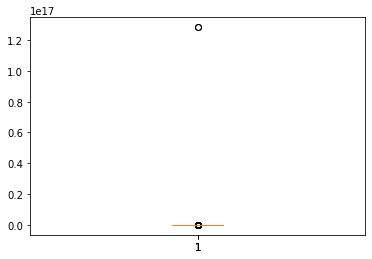

In [ ]:
plt.boxplot(output.linear_reg_pred)

{'whiskers': [<matplotlib.lines.Line2D at 0x24086e1e970>,
 'caps': [<matplotlib.lines.Line2D at 0x24086e28bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24086e1e820>],
 'medians': [<matplotlib.lines.Line2D at 0x24086d55fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24086d5db50>],
 'means': []}

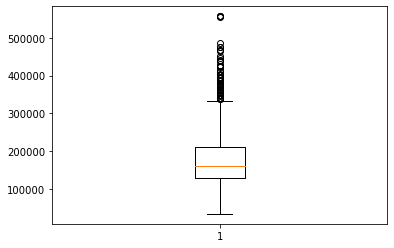

In [ ]:
plt.boxplot(output.decisiontree_reg_pred)

{'whiskers': [<matplotlib.lines.Line2D at 0x24086d9d3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x24083b5a2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24086d9d160>],
 'medians': [<matplotlib.lines.Line2D at 0x24083c19610>],
 'fliers': [<matplotlib.lines.Line2D at 0x24086cf9eb0>],
 'means': []}

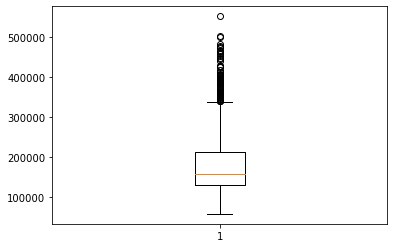

In [ ]:
plt.boxplot(output.randomforest_reg_pred)

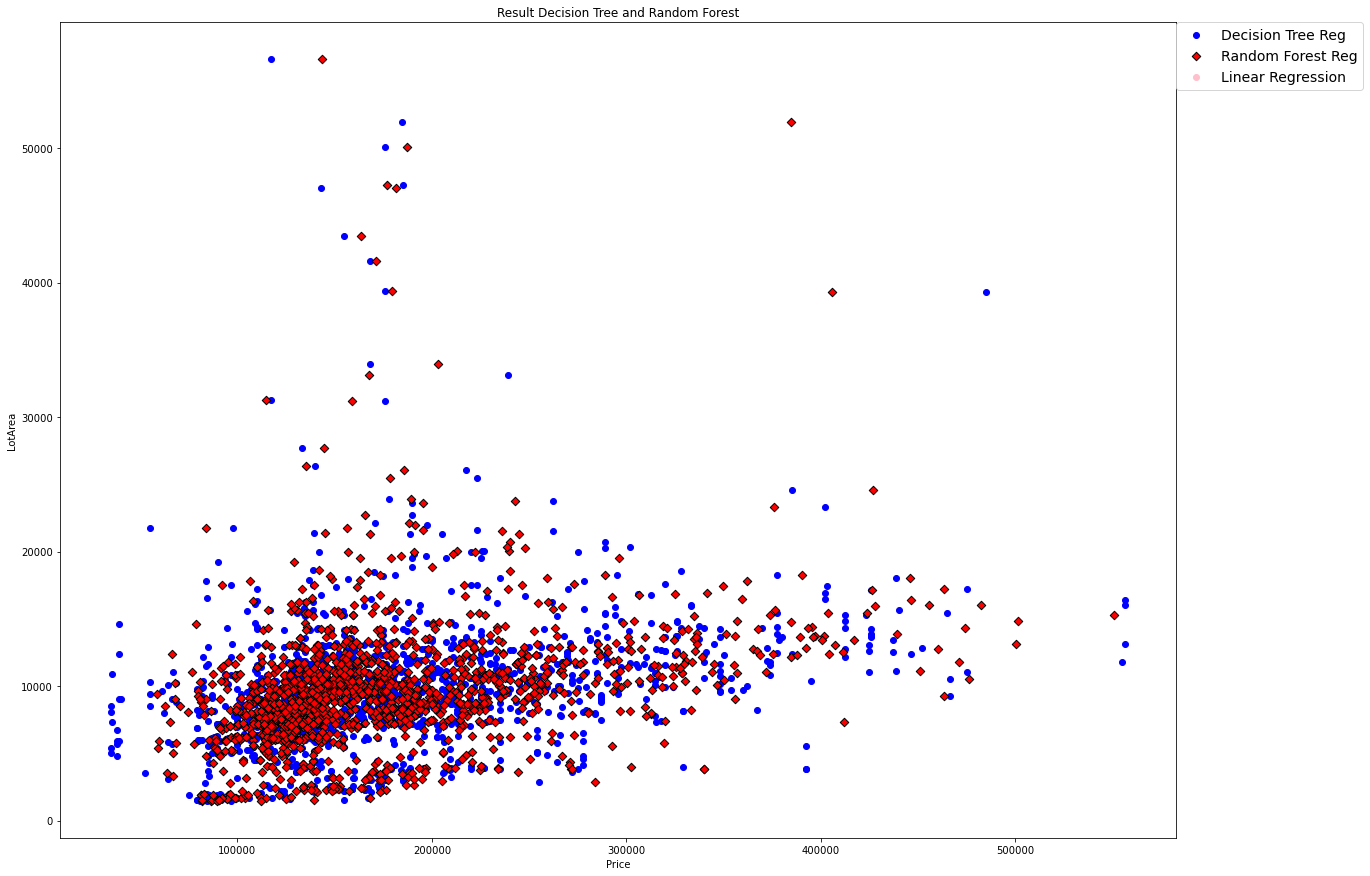

In [ ]:
plt.figure(figsize=(20, 15))
plt.title("Result Decision Tree and Random Forest")
plt.xlabel('Price')
# plt.xlabel('Predicted Values')
plt.ylabel('LotArea')
dt = plt.scatter(x=output['decisiontree_reg_pred'], y=output['LotArea'], color='blue')
rf = plt.scatter(x=output['randomforest_reg_pred'], y=output['LotArea'], color='red', marker='D', edgecolors='black')
# lr = plt.scatter(x=output['linear_reg_pred'], y=output['LotArea'], color='pink')

plt.legend((dt, rf, lr),
           ('Decision Tree Reg', 'Random Forest Reg', 'Linear Regression'),
           scatterpoints=1,
           bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.,
           ncol=1,
           fontsize=14)

plt.show()